#### Dataset Description
Train.csv - 67463 rows x 35 columns (Includes target column as Loan Status) <br>
Test.csv - 28913 rows x 34 columns(Includes target column as Loan Status) <br>
Sample Submission.csv -  Please check the Evaluation section for more details on how to generate a valid submission. <br>


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
loan_train = pd.read_csv("C:/Users/HP/Desktop/DeloitteHackathon/train.csv")
loan_train.head(4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0


In [5]:
# Importing all datasets
loan_test = pd.read_csv("C:/Users/HP/Desktop/DeloitteHackathon/test.csv")
loan_test.head(4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.08269,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.79560,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.28083,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.82351,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN


In [6]:
loan_test["Loan Status"] = 0

In [7]:
loan_test.head(4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.08269,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,0
1,22540813,7133,11650,12615.79560,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,0
2,9862181,25291,25825,11621.28083,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,0
3,10097822,30781,9664,15375.82351,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,0


### Feature Engineering 

In [8]:
loan_train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [9]:
loan_train.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


### Checking the `missing values`

In [10]:
loan_train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

 - Please Note , there is no missing values in the dataset

In [11]:
loan_train.head(3)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0


In [12]:
### Checking the categorical values in 'Object Format'

In [13]:
loan_train.Grade.value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

In [14]:
loan_train["Employment Duration"].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

In [15]:
loan_train["Application Type"].value_counts()

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

In [16]:
loan_train["Verification Status"].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

In [17]:
loan_train["Payment Plan"].value_counts()

n    67463
Name: Payment Plan, dtype: int64

#### Mean Encoding 

#### Grade

In [18]:
mean_labels=loan_train.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype='object', name='Grade')

In [19]:
enumerate(mean_labels,0)

In [20]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'B': 0, 'A': 1, 'C': 2, 'E': 3, 'D': 4, 'F': 5, 'G': 6}

In [21]:
loan_train['Grade_mean_labels']=loan_train['Grade'].map(mean_labels2)
loan_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Grade_mean_labels
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,2
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,5
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,2
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,2


In [22]:
loan_train = loan_train.drop(columns="Grade")

In [23]:
loan_train.shape

(67463, 35)

#### Employment Duration 

In [24]:
mean_labels=loan_train.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object', name='Employment Duration')

In [25]:
enumerate(mean_labels,0)

In [26]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'MORTGAGE': 0, 'RENT': 1, 'OWN': 2}

In [27]:
loan_train['Employment Duration_ordinal_labels']=loan_train['Employment Duration'].map(mean_labels2)

In [28]:
loan_train  = loan_train.drop(columns="Employment Duration")

#### Application Type

In [29]:
mean_labels=loan_train.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['JOINT', 'INDIVIDUAL'], dtype='object', name='Application Type')

In [30]:
enumerate(mean_labels,0)

In [31]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'JOINT': 0, 'INDIVIDUAL': 1}

In [32]:
loan_train['Application Type_mean_labels']=loan_train['Application Type'].map(mean_labels2)

In [33]:
loan_train = loan_train.drop(columns="Application Type")

#### Verification Status

In [34]:
mean_labels=loan_train.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['Verified', 'Not Verified', 'Source Verified'], dtype='object', name='Verification Status')

In [35]:
enumerate(mean_labels,0)

In [36]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'Verified': 0, 'Not Verified': 1, 'Source Verified': 2}

In [37]:
loan_train['Verification Status_mean_labels']=loan_train['Verification Status'].map(mean_labels2)

In [38]:
loan_train = loan_train.drop(columns="Verification Status")

###### Payment Plan

In [39]:
mean_labels=loan_train.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['n'], dtype='object', name='Payment Plan')

In [40]:
enumerate(mean_labels,0)

In [41]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'n': 0}

In [42]:
loan_train['Payment Plan_mean_labels']=loan_train['Payment Plan'].map(mean_labels2)

In [43]:
loan_train = loan_train.drop(columns="Payment Plan")

### Similarly for the test dataset

In [44]:
loan_test.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

#### Grade

In [45]:
mean_labels=loan_test.groupby(['Grade'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='Grade')

In [46]:
enumerate(mean_labels,0)

In [47]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [48]:
loan_test['Grade_mean_labels']=loan_test['Grade'].map(mean_labels2)

In [49]:
loan_test = loan_test.drop(columns="Grade")

#### Employment Duration 

In [50]:
mean_labels=loan_test.groupby(['Employment Duration'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['MORTGAGE', 'OWN', 'RENT'], dtype='object', name='Employment Duration')

In [51]:
enumerate(mean_labels,0)

In [52]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'MORTGAGE': 0, 'OWN': 1, 'RENT': 2}

In [53]:
loan_test['Employment Duration_mean_labels']=loan_test['Employment Duration'].map(mean_labels2)

In [54]:
loan_test = loan_test.drop(columns="Employment Duration")

#### Application Type

In [55]:
mean_labels=loan_test.groupby(['Application Type'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['INDIVIDUAL', 'JOINT'], dtype='object', name='Application Type')

In [56]:
enumerate(mean_labels,0)

In [57]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'INDIVIDUAL': 0, 'JOINT': 1}

In [58]:
loan_test['Application Type_mean_labels']=loan_test['Application Type'].map(mean_labels2)

In [59]:
loan_test = loan_test.drop(columns="Application Type")

#### Verification Status

In [60]:
mean_labels=loan_test.groupby(['Verification Status'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['Not Verified', 'Source Verified', 'Verified'], dtype='object', name='Verification Status')

In [61]:
enumerate(mean_labels,0)

In [62]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [63]:
loan_test['Verification Status_mean_labels']=loan_test['Verification Status'].map(mean_labels2)

In [64]:
loan_test = loan_test.drop(columns="Verification Status")

###### Payment Plan

In [65]:
mean_labels=loan_test.groupby(['Payment Plan'])['Loan Status'].mean().sort_values().index
mean_labels

Index(['n'], dtype='object', name='Payment Plan')

In [66]:
enumerate(mean_labels,0)

In [67]:
mean_labels2={k:i for i,k in enumerate(mean_labels,0)}
mean_labels2

{'n': 0}

In [68]:
loan_test['Payment Plan_mean_labels']=loan_test['Payment Plan'].map(mean_labels2)

In [69]:
loan_test = loan_test.drop(columns="Payment Plan")

#### Label Encoding For Train And Test Dataset

In [70]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in Rest Object Columns.
loan_train['Batch Enrolled']= label_encoder.fit_transform(loan_train['Batch Enrolled'])
 
loan_train['Batch Enrolled'].unique()

array([16,  4, 11, 15, 32, 29, 31, 17, 10, 13, 14, 39, 20, 19, 34, 37,  9,
       30, 25,  7, 27, 38,  2, 26, 21,  3, 18, 28,  0, 40,  8,  6, 33, 24,
       36, 35, 12, 23, 22,  5,  1])

In [71]:
loan_train['Sub Grade']= label_encoder.fit_transform(loan_train['Sub Grade'])

In [72]:
loan_train['Loan Title']= label_encoder.fit_transform(loan_train['Loan Title'])

In [73]:
loan_train['Initial List Status']= label_encoder.fit_transform(loan_train['Initial List Status'])

#### Similarly For Test Dataset

In [74]:
loan_test['Batch Enrolled']= label_encoder.fit_transform(loan_test['Batch Enrolled'])

In [75]:
loan_test['Sub Grade']= label_encoder.fit_transform(loan_test['Sub Grade'])

In [76]:
loan_test['Loan Title']= label_encoder.fit_transform(loan_test['Loan Title'])

In [77]:
loan_test['Initial List Status']= label_encoder.fit_transform(loan_test['Initial List Status'])

In [78]:
### Checking the dtypes for the dataset

In [79]:
loan_train.dtypes

ID                                      int64
Loan Amount                             int64
Funded Amount                           int64
Funded Amount Investor                float64
Term                                    int64
Batch Enrolled                          int32
Interest Rate                         float64
Sub Grade                               int32
Home Ownership                        float64
Loan Title                              int32
Debit to Income                       float64
Delinquency - two years                 int64
Inquires - six months                   int64
Open Account                            int64
Public Record                           int64
Revolving Balance                       int64
Revolving Utilities                   float64
Total Accounts                          int64
Initial List Status                     int32
Total Received Interest               float64
Total Received Late Fee               float64
Recoveries                        

In [80]:
X_train = loan_train.drop(columns="Loan Status")

In [81]:
y_train = loan_train["Loan Status"]

In [82]:
X_test = loan_test.drop(columns="Loan Status")

In [83]:
y_test = loan_test["Loan Status"]

##### Dimensions 

In [84]:
X_train.shape

(67463, 34)

In [85]:
X_test.shape

(28913, 34)

In [86]:
y_train.shape

(67463,)

In [87]:
y_test.shape

(28913,)

# Scaling And Normalizarion 

##### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [88]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_labels,Employment Duration_ordinal_labels,Application Type_mean_labels,Verification Status_mean_labels,Payment Plan_mean_labels
0,1.305072,-0.502150,1.532272,-0.058215,0.0,-0.157895,-0.049565,0.181818,2.492479,0.000000,...,-0.271429,0.0,-0.227273,1.083912,-0.421575,-0.666667,0.0,0.0,0.0,0.0
1,-0.455541,-1.030594,-0.087973,-0.075438,0.0,-0.789474,0.175612,0.545455,-0.687154,0.636364,...,0.585714,0.0,0.772727,0.360913,0.173065,0.000000,1.0,0.0,0.5,0.0
2,-0.441184,1.009013,-0.297849,1.104519,0.0,-0.421053,0.238582,0.636364,0.516400,0.000000,...,-0.028571,0.0,-0.090909,-0.160498,0.392731,1.000000,0.0,0.0,0.5,0.0
3,-0.311640,-0.405408,-0.486010,0.637354,0.0,-0.210526,1.093358,0.090909,0.907235,0.636364,...,-0.414286,0.0,0.181818,-0.613385,1.812388,0.000000,0.0,0.0,0.5,0.0
4,-0.098519,0.067554,0.014689,0.093562,0.0,0.684211,0.741486,0.636364,-0.584649,-0.363636,...,-0.714286,0.0,17.909091,0.043035,0.243675,0.000000,0.0,0.0,0.5,0.0


In [89]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_labels,Employment Duration_mean_labels,Application Type_mean_labels,Verification Status_mean_labels,Payment Plan_mean_labels
0,0.757752,0.128000,-0.229054,0.324677,0.0,-0.055556,0.091084,0.4,0.172564,1.000000,...,1.136364,0.0,-0.146341,2.053319,-0.590340,-1.0,1.0,0.0,0.0,0.0
1,-0.085027,-0.713011,-0.125232,-0.033030,0.0,0.055556,-0.982062,1.1,-0.702040,-1.000000,...,-0.060606,0.0,-0.707317,-0.206781,-0.663338,-0.5,0.0,0.0,0.0,0.0
2,-0.399743,0.816084,1.020037,-0.137376,0.0,-0.777778,0.582843,0.1,-0.401386,0.000000,...,-0.863636,0.0,-0.097561,0.984382,0.033748,-1.0,0.0,0.0,0.0,0.0
3,-0.393894,1.278400,-0.285691,0.256556,0.0,0.722222,-0.223245,-1.0,-0.000600,-0.636364,...,-0.590909,0.0,0.048780,-0.383818,-0.473691,-1.0,1.0,0.0,0.5,0.0
4,0.541270,-0.566063,-0.305486,-0.603712,-1.0,0.555556,-0.324196,-0.4,0.516302,0.000000,...,0.666667,0.0,0.073171,-0.103525,0.297412,0.0,0.5,0.0,0.5,0.0


##### DISTRIBUTION OF THE `COLUMNS` 

In [90]:
import matplotlib.pyplot as plt

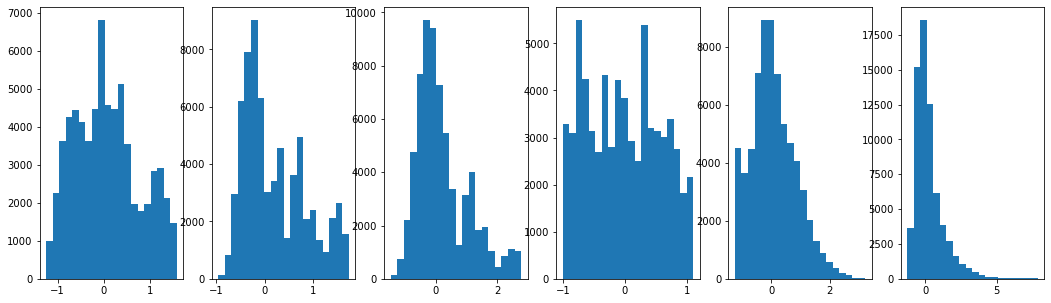

In [91]:
plt.figure(figsize=(18,5))
plt.subplot(1,6,1)
plt.hist(X_train['Loan Amount'],bins=20)
plt.subplot(1,6,2)
plt.hist(X_train['Funded Amount'],bins=20)
plt.subplot(1,6,3)
plt.hist(X_train['Funded Amount Investor'],bins=20)
plt.subplot(1,6,4)
plt.hist(X_train['Batch Enrolled'],bins=20)
plt.subplot(1,6,5)
plt.hist(X_train['Interest Rate'],bins=20)
plt.subplot(1,6,6)
plt.hist(X_train['Home Ownership'],bins=20)
plt.show()

### Checking For `Outliers`

##### Outlier Treatment

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

##### Isolation Forest

`Isolation Forest`, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

for reference,
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/


In [92]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

In [93]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [94]:
# select all rows that are not outliers
mask = yhat != -1

In [95]:
X_train = X_train[mask]

In [96]:
y_train = y_train[mask]

In [97]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(60716, 34) (60716,)


## FEATURE SELECTION 

#### Univariate Selection

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [100]:
print(model.feature_importances_)


[0.0393263  0.04019786 0.03921439 0.03969459 0.01873325 0.03835857
 0.0399369  0.03866194 0.03975933 0.03263748 0.03957788 0.02253316
 0.01245903 0.03861881 0.00921616 0.03916621 0.03947818 0.04002472
 0.00633919 0.03927748 0.03991926 0.03884573 0.03879721 0.00213901
 0.03932833 0.         0.03918178 0.04027746 0.03937386 0.03036047
 0.01573351 0.00046428 0.02236769 0.        ]


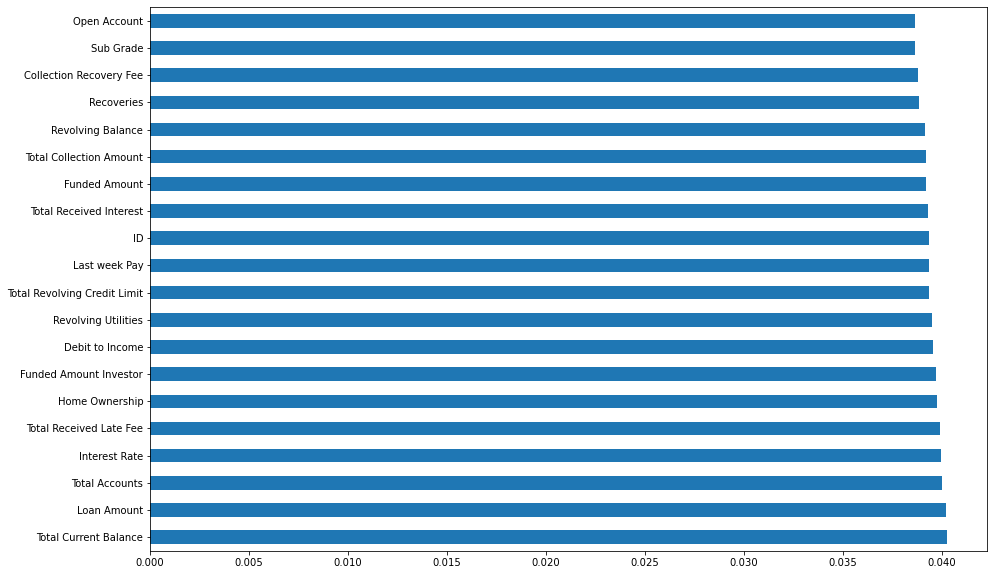

In [101]:
plt.figure(figsize = [15,10])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

### Importance Of The Features Wrt, `Label/Target Variable`

In [102]:
ranked_features.nlargest(20, keep='all')

Total Current Balance           0.040277
Loan Amount                     0.040198
Total Accounts                  0.040025
Interest Rate                   0.039937
Total Received Late Fee         0.039919
Home Ownership                  0.039759
Funded Amount Investor          0.039695
Debit to Income                 0.039578
Revolving Utilities             0.039478
Total Revolving Credit Limit    0.039374
Last week Pay                   0.039328
ID                              0.039326
Total Received Interest         0.039277
Funded Amount                   0.039214
Total Collection Amount         0.039182
Revolving Balance               0.039166
Recoveries                      0.038846
Collection Recovery Fee         0.038797
Sub Grade                       0.038662
Open Account                    0.038619
dtype: float64

### Correlation - To Check `Multicollinearity`

In [103]:
X_train.corr()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Home Ownership,Loan Title,...,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Grade_mean_labels,Employment Duration_ordinal_labels,Application Type_mean_labels,Verification Status_mean_labels,Payment Plan_mean_labels
ID,1.000000,-0.003023,-0.007852,-0.000740,0.010864,0.004296,0.003614,0.007624,-0.003372,0.000605,...,0.003336,NaN,-0.001517,-0.009598,-0.002346,-0.001226,0.000062,0.001031,0.007876,NaN
Loan Amount,-0.003023,1.000000,-0.002603,0.003634,0.006731,0.002454,-0.005984,-0.005884,0.014311,-0.005567,...,-0.001674,NaN,-0.003175,-0.008088,0.007810,-0.032580,-0.027593,-0.004810,-0.014035,NaN
Funded Amount,-0.007852,-0.002603,1.000000,0.008099,0.001296,0.002174,-0.001295,0.001328,-0.006782,0.001132,...,-0.002492,NaN,-0.009346,-0.006790,0.004447,-0.006713,0.012622,-0.003896,-0.003036,NaN
Funded Amount Investor,-0.000740,0.003634,0.008099,1.000000,0.012138,0.000758,-0.006219,-0.004376,-0.000852,-0.000656,...,0.000534,NaN,-0.007650,-0.006308,-0.000502,0.002632,-0.016935,-0.004933,-0.003603,NaN
Term,0.010864,0.006731,0.001296,0.012138,1.000000,-0.000171,0.003657,-0.002004,0.001790,-0.000629,...,0.009446,NaN,0.013854,0.005568,0.010615,0.020429,0.012242,-0.001058,-0.005619,NaN
Batch Enrolled,0.004296,0.002454,0.002174,0.000758,-0.000171,1.000000,0.000241,0.002499,-0.000361,-0.001177,...,-0.005169,NaN,-0.004266,-0.010720,0.000003,0.007214,-0.013496,0.001636,0.005791,NaN
Interest Rate,0.003614,-0.005984,-0.001295,-0.006219,0.003657,0.000241,1.000000,-0.004265,0.005109,0.001565,...,-0.012470,NaN,-0.000701,-0.006113,0.015889,0.009468,0.011980,0.002496,-0.000046,NaN
Sub Grade,0.007624,-0.005884,0.001328,-0.004376,-0.002004,0.002499,-0.004265,1.000000,0.004362,-0.006336,...,0.005336,NaN,-0.009300,0.005253,0.002182,0.017958,-0.002847,-0.000194,0.007419,NaN
Home Ownership,-0.003372,0.014311,-0.006782,-0.000852,0.001790,-0.000361,0.005109,0.004362,1.000000,0.002959,...,-0.005615,NaN,-0.005247,-0.000390,0.001840,0.012280,-0.028108,0.001309,-0.011253,NaN
Loan Title,0.000605,-0.005567,0.001132,-0.000656,-0.000629,-0.001177,0.001565,-0.006336,0.002959,1.000000,...,0.007832,NaN,0.002626,-0.002440,0.001230,0.007151,-0.001809,-0.002024,0.006458,NaN


<AxesSubplot:>

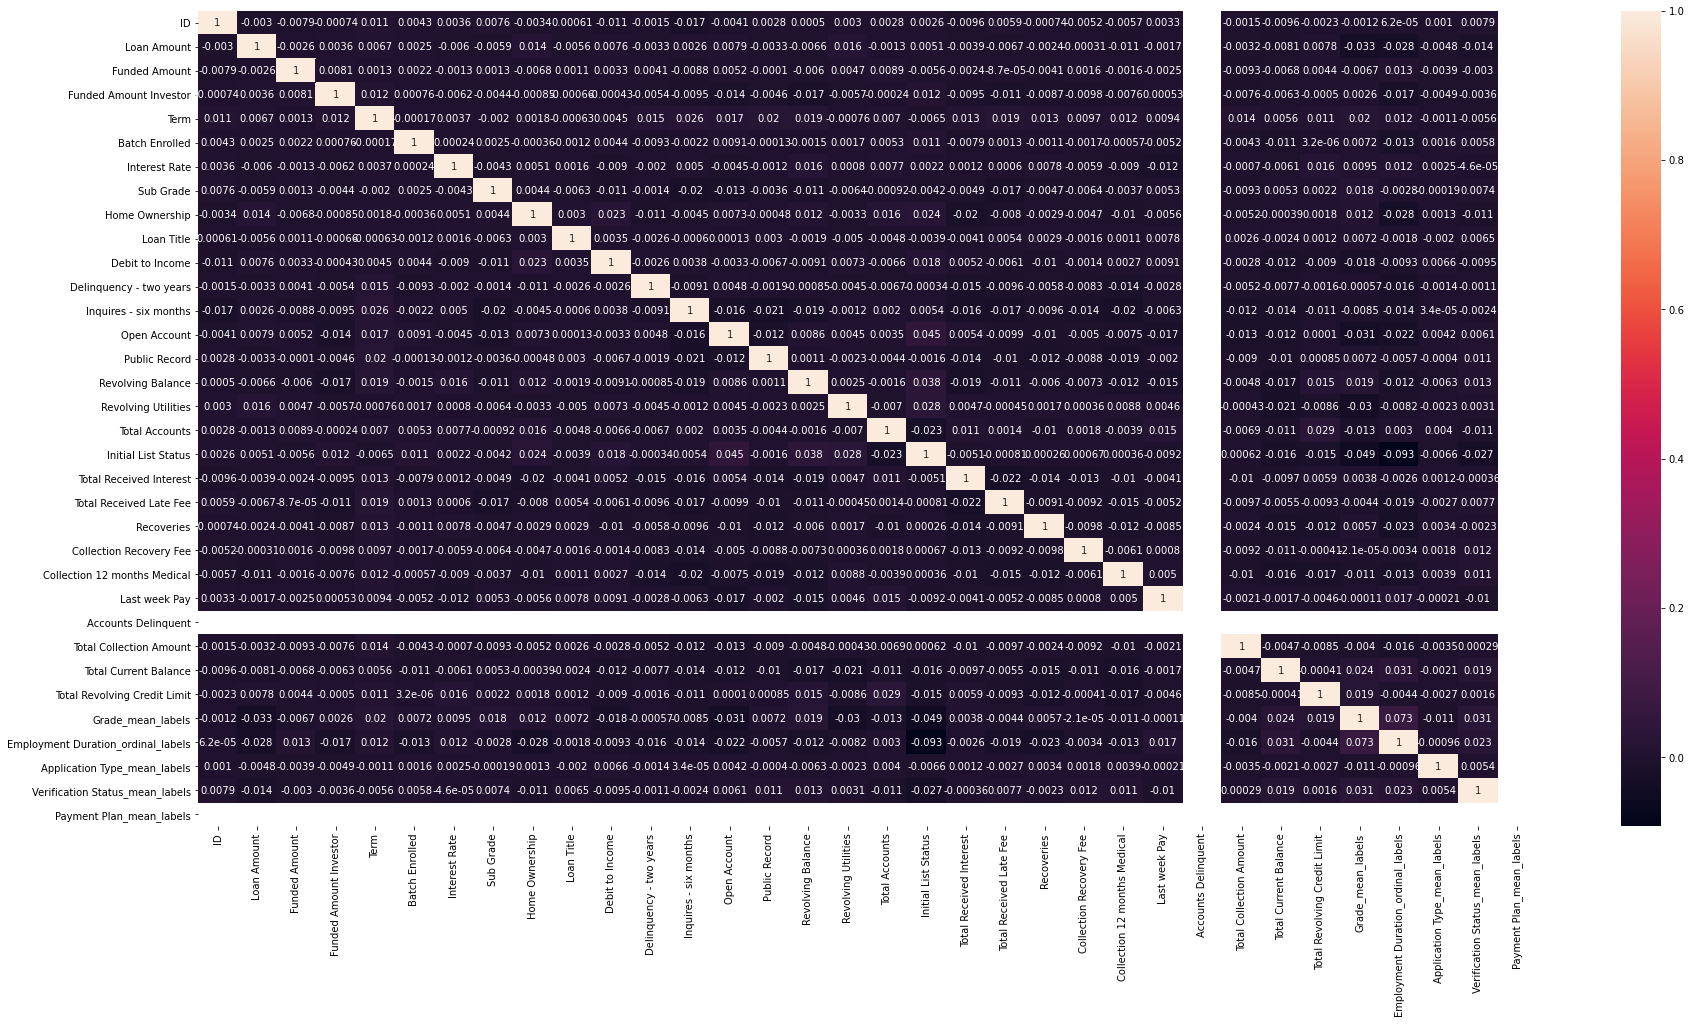

In [104]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(30,15))
sns.heatmap(X_train[top_features].corr(),annot=True)


### Reduction Of `Multi Collinearity`

In [105]:
threshold=0.6

In [106]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [107]:
correlation(X_train,threshold)

set()

#### Information Gain

In [108]:
from sklearn.feature_selection import mutual_info_classif

In [109]:
mutual_info=mutual_info_classif(X_train,y_train)

In [110]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

Initial List Status                   0.003009
Loan Title                            0.002710
Sub Grade                             0.002314
Collection Recovery Fee               0.002143
Delinquency - two years               0.002037
Revolving Utilities                   0.001959
Employment Duration_ordinal_labels    0.001486
Grade_mean_labels                     0.001435
Recoveries                            0.001376
Funded Amount Investor                0.001323
Term                                  0.001271
Verification Status_mean_labels       0.001259
Total Collection Amount               0.000975
Funded Amount                         0.000972
Total Received Interest               0.000906
Loan Amount                           0.000807
Total Accounts                        0.000731
Last week Pay                         0.000655
Application Type_mean_labels          0.000505
Open Account                          0.000487
Total Current Balance                 0.000386
Revolving Bal

From the above Information, <br>
We will be `ignorning` the feature variable with No `Information Gain` <br>

- Payment Plan_mean_labels         <br>
- Home Ownership          <br>
- Debit to Income        <br>
- Delinquency - two years        <br>
- Revolving Balance       <br>
- Total Received Late Fee        <br>
- Last week Pay  <br>
- Total Accounts <br>
- ID <br>
- Application Type_mean_labels <br>
- Total Collection Amount <br>
- Total Revolving Credit Limit <br>

In [111]:
X_train = X_train.drop(columns = ['Payment Plan_mean_labels', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Received Late Fee', 'Last week Pay', 'Total Accounts', 'ID', 'Application Type_mean_labels', 'Total Collection Amount', 'Total Revolving Credit Limit'])

In [112]:
X_test = X_test.drop(columns = ['Payment Plan_mean_labels', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Received Late Fee', 'Last week Pay', 'Total Accounts', 'ID', 'Application Type_mean_labels', 'Total Collection Amount', 'Total Revolving Credit Limit'])

#### Final Dimensions - After Evaluation the Criteria For `Information Gain`

In [113]:
X_train.shape

(60716, 22)

In [114]:
X_test.shape

(28913, 22)

### Checking If the Dataset is balanced or not

In [115]:
y_train.value_counts()

0    55183
1     5533
Name: Loan Status, dtype: int64

Text(0, 0.5, 'Frequency')

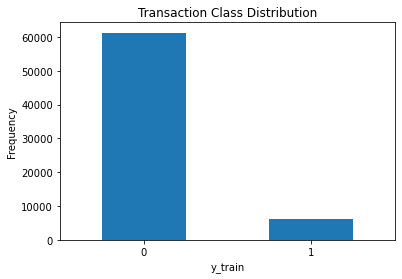

In [116]:
count_classes = pd.value_counts(loan_train['Loan Status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

#plt.xticks(range(2), LABELS)

plt.xlabel("y_train")

plt.ylabel("Frequency")

#### SMOTETomek

class imblearn.combine.SMOTETomek(*, sampling_strategy='auto', random_state=None, smote=None, tomek=None, n_jobs=None)[source]
Over-sampling using SMOTE and cleaning using Tomek links.

Combine over- and under-sampling using SMOTE and Tomek links.

Read more in the User Guide.

In [117]:
from imblearn.combine import SMOTETomek

In [118]:
from collections import Counter
Counter(y_train)

Counter({0: 55183, 1: 5533})

In [119]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 55183, 1: 5533})
The number of classes after fit Counter({0: 55149, 1: 41353})


In [120]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [121]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19944  8969]
 [    0     0]]
0.689793518486494
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     28913
           1       0.00      0.00      0.00         0

    accuracy                           0.69     28913
   macro avg       0.50      0.34      0.41     28913
weighted avg       1.00      0.69      0.82     28913



## PIPELINE CREATION TO CHECK WHICH MODEL WORKS BETTER

In [122]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [123]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [124]:
pipeline_lr=Pipeline([('scalar1',RobustScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [125]:
pipeline_dt=Pipeline([('scalar2',RobustScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [126]:
pipeline_randomforest=Pipeline([('scalar3',RobustScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [127]:
pipeline_gradient_boost=Pipeline([('scalar4',RobustScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('gb_classifier',GradientBoostingClassifier())])

In [128]:
pipeline_XGboost=Pipeline([('scalar5',RobustScaler()),
                          ('pca5',PCA(n_components=2)),
                          ('xgb_classifier',XGBClassifier())])

In [129]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_gradient_boost,pipeline_XGboost]

In [130]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [131]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'Gradient Boost', 4: 'Extreme Gradient Boost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train_ns, y_train_ns)

[17:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [132]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 1.0
Decision Tree Test Accuracy: 0.5786670355895273
RandomForest Test Accuracy: 0.6951890153218275
Gradient Boost Test Accuracy: 0.9954691661190468
Extreme Gradient Boost Test Accuracy: 0.9096946010445128


In [133]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression


In [134]:
y_train_ns.value_counts()

0    55149
1    41353
Name: Loan Status, dtype: int64

### Let's Use Logistic Regression

In [135]:
### Manual Hyperparameter Tuning

model=LogisticRegression(penalty='l2',solver='liblinear',max_iter=100).fit(X_train_ns,y_train_ns)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[28872    41]
 [    0     0]]
0.9985819527548162
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28913
           1       0.00      0.00      0.00         0

    accuracy                           1.00     28913
   macro avg       0.50      0.50      0.50     28913
weighted avg       1.00      1.00      1.00     28913



##### Randomized Search Cv

In [136]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
penalty = ['l1', 'l2', 'elasticnet', 'none']
# Maximum number of levels in tree
C=np.logspace(-4, 4, 20)
# Minimum number of samples required to split a node
solver=['lbfgs','newton-cg','liblinear','sag','saga']
# Minimum number of samples required at each leaf node
max_iter=[100, 1000,2500, 5000]
# Create the random grid
random_grid = {'penalty': penalty,
               'C': C,
               'solver': solver,
               'max_iter': max_iter}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}


In [137]:
rf=LogisticRegression()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_ns,y_train_ns)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.1min finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [138]:
rf_randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 10000.0}

In [139]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [140]:
best_random_grid=rf_randomcv.best_estimator_

In [141]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[28879    34]
 [    0     0]]
Accuracy Score 0.9988240583820427
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28913
           1       0.00      0.00      0.00         0

    accuracy                           1.00     28913
   macro avg       0.50      0.50      0.50     28913
weighted avg       1.00      1.00      1.00     28913



In [142]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[28879    34]
 [    0     0]]


<Figure size 360x360 with 0 Axes>

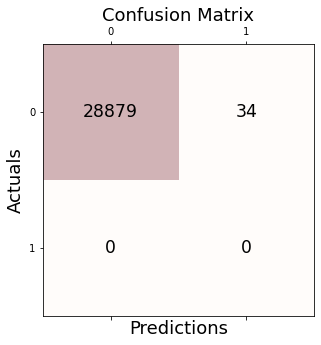

In [143]:
#
# Print the confusion matrix using Matplotlib
#
plt.figure(figsize = [5,5])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Evaluation To Check If the Model Is Over Or Under Fitting 
### 1. As we can see the accuracy for train and test data is near about , so there is issues. Also , we did resampling previously

In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test, y_pred))

0.9988240583820427


In [145]:
y_pred2=best_random_grid.predict(X_train)

In [146]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train, y_pred2))

0.90696027406285


In [147]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_pred)

In [148]:
# Let's see the head
y_pred_1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [149]:
y_pred_1.value_counts()

0    28879
1       34
dtype: int64

In [150]:
y_pred_final = y_pred_1.rename(columns={0:"Loan Status"})

In [151]:
y_pred_final.to_csv('my_submission_file.csv', index=False)